In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("merged_output.csv")
df.head()

/var/folders/jk/26c0nrvd30sbw9k4_2ns250c0000gn/T/ipykernel_63283/1192622700.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_output.csv")


,__typename_Rating,adminReviewedAt_Rating,attendanceMandatory_Rating,clarityRating_Rating,class_Rating,comment_Rating,createdByUser_Rating,date_Rating,difficultyRating_Rating,flagStatus_Rating,...,thumbs_Rating,thumbsDownTotal_Rating,thumbsUpTotal_Rating,wouldTakeAgain_Rating,ProfessorName,Department,SchoolName,LegacyId,NumRatings,predictedGender
0,Rating,2014-10-12 19:53:44 +0000 UTC,NaN,5.0,PH1C,genius enthusiastic really cares that we learn...,False,2014-10-12 19:51:32 +0000 UTC,3.0,UNFLAGGED,...,[],0.0,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male
1,Rating,NaN,NaN,4.0,PHYS1,this guy actually sat down with me and went ov...,False,2005-12-08 02:15:58 +0000 UTC,2.0,UNFLAGGED,...,[{'computerId': '7610E82DC63E5465E4DECE93C5AB4...,0.0,2.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male
2,Rating,NaN,NaN,2.0,PH1BC,seemed sort of scary to me lectures really had...,False,2005-06-01 22:21:35 +0000 UTC,5.0,UNFLAGGED,...,[{'computerId': '7610E82DC63E5465E4DECE93C5AB4...,1.0,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male
3,Rating,NaN,NaN,5.0,PH1BC,no comments,False,2005-02-13 22:58:06 +0000 UTC,3.0,UNFLAGGED,...,[{'computerId': '2D777623F4F23069E44333A863E40...,0.0,1.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male
4,Rating,NaN,NaN,3.0,PH1BC,he made fun of me gt o,False,2004-06-04 01:14:40 +0000 UTC,4.0,UNFLAGGED,...,[],0.0,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male


In [3]:
df.isnull().sum()

__typename_Rating                   0
adminReviewedAt_Rating         488176
attendanceMandatory_Rating    1492877
clarityRating_Rating                0
class_Rating                      138
comment_Rating                   1533
createdByUser_Rating                0
date_Rating                         0
difficultyRating_Rating             0
flagStatus_Rating                   0
grade_Rating                  1658767
helpfulRating_Rating                0
id_Rating                           0
isForCredit_Rating                  0
isForOnlineClass_Rating             0
legacyId_Rating                     0
ratingTags_Rating             1787132
teacherNote_Rating            2966818
textbookUse_Rating             452105
thumbs_Rating                       0
thumbsDownTotal_Rating              0
thumbsUpTotal_Rating                0
wouldTakeAgain_Rating         1764775
ProfessorName                       0
Department                          0
SchoolName                          0
LegacyId    

In [4]:
df = df[df['predictedGender'] != 'Neutral']

In [5]:
common_asian_names = [
    'Chen', 'Chang', 'Chao', 'Cheng', 'Cho', 'Choi', 'Chong', 'Chou', 'Chow', 'Chu', 'Feng', 'Gao', 'Guo', 'Ho',
    'Hsu', 'Huang', 'Jiang', 'Kim', 'Koh', 'Kuo', 'Lee', 'Leong', 'Li', 'Liang', 'Lim', 'Lin', 'Liu', 'Lu', 'Ma',
    'Ng', 'Nguyen', 'Ong', 'Park', 'Phan', 'Shen', 'Singh', 'Song', 'Tan', 'Tang', 'Wang', 'Wong', 'Wu', 'Xu',
    'Yang', 'Yao', 'Yeh', 'Yen', 'Yeo', 'Yong', 'Yu', 'Yuan', 'Yuen', 'Zhang', 'Zhao', 'Zhou',
    'Patel', 'Shah', 'Khan', 'Singh', 'Sharma', 'Gupta', 'Kumar', 'Joshi', 'Desai', 'Mehta', 'Choudhury', 'Malhotra',
    'Gandhi', 'Verma', 'Reddy', 'Bose', 'Sinha', 'Rao', 'Thakur', 'Roy', 'Das', 'Pandey', 'Naidu', 'Menon', 'Iyer',
    'Nair', 'Raj', 'Chatterjee', 'Mukherjee'
]

In [6]:
def is_asian(name):
    if any(asian_name in name for asian_name in common_asian_names):
        return "Yes"
    else:
        return "No"

df['AsianProfessor'] = df['ProfessorName'].apply(is_asian)

In [7]:
# Extract unique elements from department
unique_elements = df['Department'].unique()

# Create a new DataFrame with unique elements
dept_df = pd.DataFrame(unique_elements, columns=['Departments'])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Define the categories for each group
STEM = ['Science','Computer Science', 'Mathematics', 'Chemistry', 'Engineering', 'Physics', 'Biology', 'Geology', 'Astronomy', 'Information Science', 'Electrical Engineering', 'Cognitive Science', 'Mechanical Engineering']
BUSINESS = ['Economics', 'Business', 'Finance', 'Marketing', 'International Studies', 'Criminal Justice']
HUMANITIES = ['Philosophy', 'Languages', 'Humanities', 'English', 'History', 'Theology', 'Art History', 'Anthropology', 'Linguistics', 'Literature', 'Classics', 'Religious Studies', 'Religion', 'Comparative Literature', 'Fine Arts', 'Music', 'Geography', 'Sociology', 'Social Work', 'Near Eastern Studies', 'Political Science', 'Social Science', 'History']
OTHERS = ['Culinary Arts', 'Psychology', 'Education', 'Health Science', 'Communication', 'Technology', 'Film','Music']

# Combine all categories
all_categories = STEM + BUSINESS + HUMANITIES + OTHERS

# Create a DataFrame with categories
category_df = pd.DataFrame({'Department': all_categories})

# Define the labels for each category
category_labels = ['STEM'] * len(STEM) + ['BUSINESS'] * len(BUSINESS) + ['HUMANITIES'] * len(HUMANITIES) + ['OTHERS'] * len(OTHERS)

# Add the labels to the DataFrame
category_df['Category'] = category_labels
category_df

,Department,Category
0,Science,STEM
1,Computer Science,STEM
2,Mathematics,STEM
3,Chemistry,STEM
4,Engineering,STEM
5,Physics,STEM
6,Biology,STEM
7,Geology,STEM
8,Astronomy,STEM
9,Information Science,STEM


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

STEM = ['Science', 'Computer Science','Geography','Technology','Mathematics', 'Chemistry', 'Engineering', 'Physics', 'Biology', 'Geology', 'Astronomy', 'Information Science', 'Electrical Engineering', 'Cognitive Science', 'Mechanical Engineering','Engineering','chemistry']
BUSINESS = ['Economics', 'Business', 'Finance', 'Marketing', 'International Studies', 'Criminal Justice','Accounts','Human Resources','Management']
HUMANITIES = ['Philosophy', 'Languages', 'Humanities', 'English', 'History', 'Theology', 'Art History','Classics', 'Anthropology', 'Linguistics', 'Literature', 'Religious Studies','Linguistics', 'Classics','Literature', 'Religion', 'Comparative Literature']
OTHERS = ['Culinary Arts', 'Psychology', 'Education', 'Health Science', 'Communication', 'Technology', 'Film']

# Combine all categories
all_categories = STEM + BUSINESS + HUMANITIES + OTHERS

# Create a DataFrame with categories
category_df = pd.DataFrame({'Departments': all_categories})

# Define the labels for each category
category_labels = ['STEM'] * len(STEM) + ['BUSINESS'] * len(BUSINESS) + ['HUMANITIES'] * len(HUMANITIES) + ['OTHERS'] * len(OTHERS)

# Add the labels to the DataFrame
category_df['Category'] = category_labels

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Vectorize the department names from the first 50 records in df
X_train = tfidf_vectorizer.fit_transform(df['Department'][:50])

# Encode the category labels for the first 50 records
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(category_df['Category'])

# Train a Support Vector Machine (SVM) classifier on the first 50 records
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict categories for the first 50 records
predicted_categories_train = svm_classifier.predict(X_train)

# Map the predicted categories back to the department names for the first 50 records
predicted_category_labels_train = label_encoder.inverse_transform(predicted_categories_train)

# Create the 'Predicted_Category' column in the DataFrame for the first 50 records
df['Predicted_Category'] = ''

# Add the predicted categories to the 'Predicted_Category' column for the first 50 records
df.loc[:49, 'Predicted_Category'] = predicted_category_labels_train

# Calculate accuracy for the first 50 records
accuracy_train = accuracy_score(y_train, predicted_categories_train)

# Display the accuracy for the first 50 records
print(f"Accuracy for the first 50 records: {accuracy_train}")

# Vectorize the department names from the remaining 1200 records in df
X_test = tfidf_vectorizer.transform(df['Department'][50:])

# Predict categories for the remaining 1200 records
predicted_categories_test = svm_classifier.predict(X_test)

# Map the predicted categories back to the department names for the remaining 1200 records
predicted_category_labels_test = label_encoder.inverse_transform(predicted_categories_test)

# Add the predicted categories to the 'Predicted_Category' column for the remaining 1200 records
df.loc[50:, 'Predicted_Category'] = predicted_category_labels_test

# Display the resulting DataFrame with the predicted categories
df.head(10)


Accuracy for the first 50 records: 0.74


,__typename_Rating,adminReviewedAt_Rating,attendanceMandatory_Rating,clarityRating_Rating,class_Rating,comment_Rating,createdByUser_Rating,date_Rating,difficultyRating_Rating,flagStatus_Rating,...,thumbsUpTotal_Rating,wouldTakeAgain_Rating,ProfessorName,Department,SchoolName,LegacyId,NumRatings,predictedGender,AsianProfessor,Predicted_Category
0,Rating,2014-10-12 19:53:44 +0000 UTC,NaN,5.0,PH1C,genius enthusiastic really cares that we learn...,False,2014-10-12 19:51:32 +0000 UTC,3.0,UNFLAGGED,...,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
1,Rating,NaN,NaN,4.0,PHYS1,this guy actually sat down with me and went ov...,False,2005-12-08 02:15:58 +0000 UTC,2.0,UNFLAGGED,...,2.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
2,Rating,NaN,NaN,2.0,PH1BC,seemed sort of scary to me lectures really had...,False,2005-06-01 22:21:35 +0000 UTC,5.0,UNFLAGGED,...,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
3,Rating,NaN,NaN,5.0,PH1BC,no comments,False,2005-02-13 22:58:06 +0000 UTC,3.0,UNFLAGGED,...,1.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
4,Rating,NaN,NaN,3.0,PH1BC,he made fun of me gt o,False,2004-06-04 01:14:40 +0000 UTC,4.0,UNFLAGGED,...,0.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
5,Rating,NaN,NaN,5.0,PH2AB,amazing philosophy toward teaching concerned w...,False,2002-08-20 15:23:20 +0000 UTC,4.0,UNFLAGGED,...,1.0,NaN,David Politzer,Science,California Institute of Technology,60323,6,Male,No,STEM
6,Rating,2012-04-06 22:51:02 +0000 UTC,NaN,5.0,BI150,amazing prof,False,2012-04-06 22:49:45 +0000 UTC,3.0,UNFLAGGED,...,0.0,NaN,Henry Lester,Science,California Institute of Technology,90542,13,Male,No,STEM
7,Rating,2011-11-08 19:44:54 +0000 UTC,NaN,5.0,CNS150,lester is an amazing and caring educator he ma...,False,2011-11-08 19:25:53 +0000 UTC,4.0,UNFLAGGED,...,0.0,NaN,Henry Lester,Science,California Institute of Technology,90542,13,Male,No,STEM
8,Rating,NaN,NaN,3.0,BI1,no comments,False,2006-10-06 04:14:09 +0000 UTC,2.0,UNFLAGGED,...,0.0,NaN,Henry Lester,Science,California Institute of Technology,90542,13,Male,No,STEM
9,Rating,NaN,NaN,5.0,BI1,extremely interested in the students tries to ...,False,2005-05-12 18:42:36 +0000 UTC,3.0,UNFLAGGED,...,0.0,NaN,Henry Lester,Science,California Institute of Technology,90542,13,Male,No,STEM


In [10]:
category_counts = df['Predicted_Category'].value_counts()

# Print the total count of each category
print(category_counts)

HUMANITIES    2504412
STEM           207097
OTHERS         137107
BUSINESS       115687
Name: Predicted_Category, dtype: int64


In [11]:
public_universities = [
    "University of California Berkeley (UCB)",
    "University of California, Los Angeles (UCLA)",
    "University of California, Davis (UCD)",
    "University of California, San Diego (UCSD)",
    "University of California, Santa Barbara (UCSB)",
    "University of Illinois at Urbana-Champaign",
    "University of Texas at Austin",
    "University of Washington",
    "University of Wisconsin-Madison",
    "Pennsylvania State University",
    "Michigan State University",
    "Ohio State University",
    "University of North Carolina, Chapel Hill",
    "Texas A&M University",
    "Washington University in St. Louis",
    "University of Florida",
    "University of Maryland, College Park",
    "Arizona State University",
    "University of Minnesota, Twin Cities",
    "University of Pittsburgh",
    "University of Massachusetts, Amherst",
    "University of California, Riverside (UCR)",
    "University of Colorado at Boulder",
    "University of California, Irvine (UCI)",
    "North Carolina State University",
    "University of Arizona",
    "University of Georgia",
    "University of California, Santa Cruz (UCSC)",
    "University of Hawai'i at Manoa",
    "Stony Brook University",
    "University of California, Riverside (UCR)",
    "Iowa State University",
    "Colorado State University",
    "University of Kansas",
    "Washington State University",
    "University of Utah",
    "University of Connecticut",
    "University of Tennessee, Knoxville",
    "Florida State University",
    "Colorado School of Mines",
    "Missouri University of Science and Technology",
    "University at Buffalo SUNY",
    "University of Iowa",
    "University of Delaware",
    "Oregon State University",
    "University of Texas Dallas",
    "City University of New York"
]

# Function to categorize universities as public or private
def categorize_university(university_name):
    if any(public_uni in university_name for public_uni in public_universities):
        return "Public"
    else:
        return "Private"

# Add a new column 'University_Category' to df
df['University_Category'] = df['SchoolName'].apply(categorize_university)

# Display the updated DataFrame
print(df[['SchoolName', 'University_Category']].head(50))


                            SchoolName University_Category
0   California Institute of Technology             Private
1   California Institute of Technology             Private
2   California Institute of Technology             Private
3   California Institute of Technology             Private
4   California Institute of Technology             Private
5   California Institute of Technology             Private
6   California Institute of Technology             Private
7   California Institute of Technology             Private
8   California Institute of Technology             Private
9   California Institute of Technology             Private
10  California Institute of Technology             Private
11  California Institute of Technology             Private
12  California Institute of Technology             Private
13  California Institute of Technology             Private
14  California Institute of Technology             Private
15  California Institute of Technology             Priva

In [12]:
df['University_Category'].nunique()

2

In [13]:
online_class_counts = df['isForOnlineClass_Rating'].value_counts()

In [14]:
df['isForOnlineClass_Rating'].nunique()

2

In [8]:
series_data = pd.Series(df['date_Rating'])

In [16]:
print(df.dtypes)

__typename_Rating              object
adminReviewedAt_Rating         object
attendanceMandatory_Rating     object
clarityRating_Rating          float64
class_Rating                   object
comment_Rating                 object
createdByUser_Rating             bool
date_Rating                    object
difficultyRating_Rating       float64
flagStatus_Rating              object
grade_Rating                   object
helpfulRating_Rating          float64
id_Rating                      object
isForCredit_Rating               bool
isForOnlineClass_Rating          bool
legacyId_Rating               float64
ratingTags_Rating              object
teacherNote_Rating             object
textbookUse_Rating            float64
thumbs_Rating                  object
thumbsDownTotal_Rating        float64
thumbsUpTotal_Rating          float64
wouldTakeAgain_Rating         float64
ProfessorName                  object
Department                     object
SchoolName                     object
LegacyId    

In [9]:
df = pd.DataFrame(df)

df['date_Rating'] = df['date_Rating'].str.replace(' UTC', '')

# Convert the 'Date' column to datetime type with explicit format
df['date_Rating'] = pd.to_datetime(df['date_Rating'], format='%Y-%m-%d %H:%M:%S %z')

print(df.dtypes)

__typename_Rating                          object
adminReviewedAt_Rating                     object
attendanceMandatory_Rating                 object
clarityRating_Rating                      float64
class_Rating                               object
comment_Rating                             object
createdByUser_Rating                         bool
date_Rating                   datetime64[ns, UTC]
difficultyRating_Rating                   float64
flagStatus_Rating                          object
grade_Rating                               object
helpfulRating_Rating                      float64
id_Rating                                  object
isForCredit_Rating                           bool
isForOnlineClass_Rating                      bool
legacyId_Rating                           float64
ratingTags_Rating                          object
teacherNote_Rating                         object
textbookUse_Rating                        float64
thumbs_Rating                              object


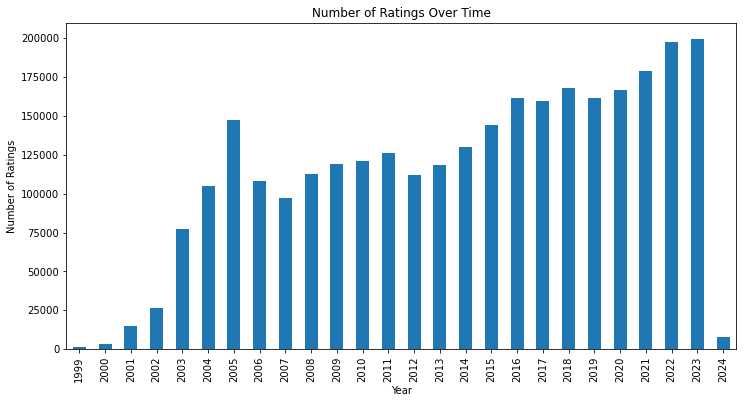

In [18]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the count of ratings over time
df['date_Rating'].dt.year.value_counts().sort_index().plot(kind='bar')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings Over Time')

# Show the plot
plt.show()


In [19]:
# Calculate the average 'wouldTakeAgain_Rating' for each year
average_ratings = df.groupby(df['date_Rating'].dt.year)['wouldTakeAgain_Rating'].mean()

# Print the result
print(average_ratings)


date_Rating
1999         NaN
2000         NaN
2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009         NaN
2010         NaN
2011         NaN
2012         NaN
2013         NaN
2014         NaN
2015         NaN
2016    0.702794
2017    0.708396
2018    0.714091
2019    0.671918
2020    0.649137
2021    0.637658
2022    0.931412
2023    0.999924
2024    0.999402
Name: wouldTakeAgain_Rating, dtype: float64


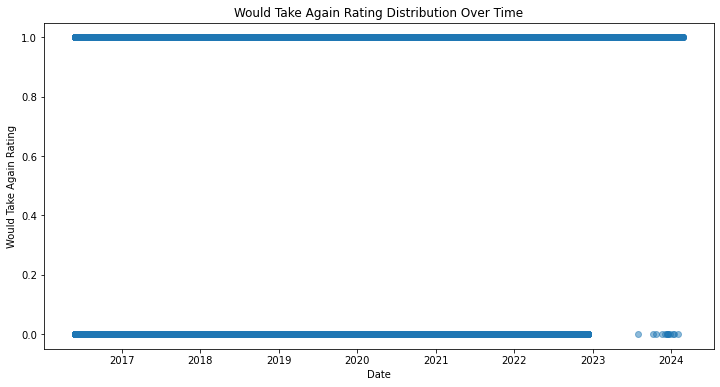

In [20]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the distribution of 'wouldTakeAgain_Rating' over time
plt.scatter(df['date_Rating'], df['wouldTakeAgain_Rating'], alpha=0.5)

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Would Take Again Rating')
plt.title('Would Take Again Rating Distribution Over Time')

# Show the plot
plt.show()

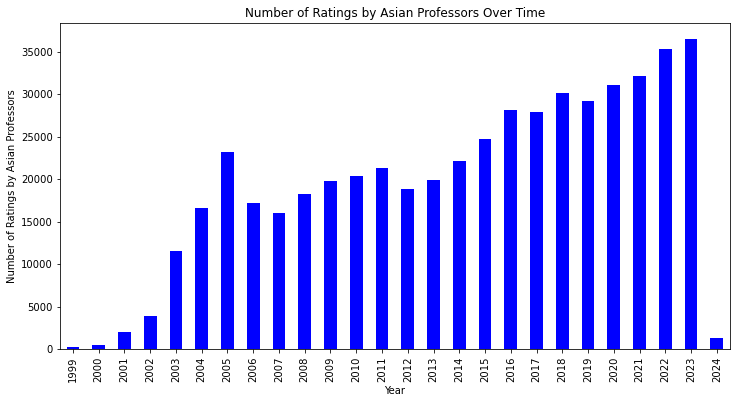

Average Ratings by Asian Professors Over Time:
 date_Rating
1999         NaN
2000         NaN
2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009         NaN
2010         NaN
2011         NaN
2012         NaN
2013         NaN
2014         NaN
2015         NaN
2016    0.688671
2017    0.702165
2018    0.698655
2019    0.666245
2020    0.644844
2021    0.635197
2022    0.928722
2023    0.999959
2024    1.000000
Name: wouldTakeAgain_Rating, dtype: float64


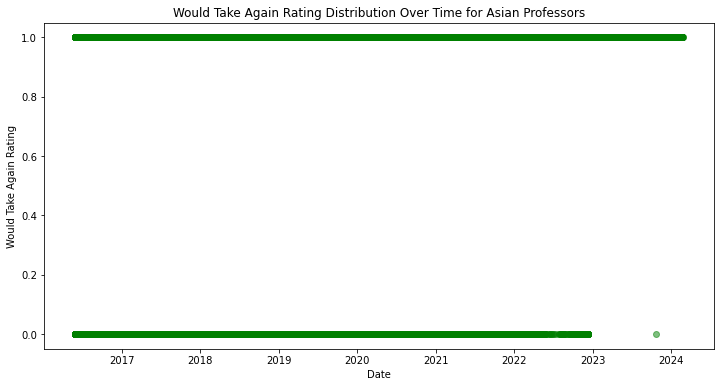

In [21]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only ratings by Asian professors
asian_df = df[df['AsianProfessor'] == 'Yes']

# Plotting Trends Over Time for Asian Professors
plt.figure(figsize=(12, 6))
asian_df['date_Rating'].dt.year.value_counts().sort_index().plot(kind='bar', color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Ratings by Asian Professors')
plt.title('Number of Ratings by Asian Professors Over Time')
plt.show()

# Calculating Average Ratings Over Time Intervals for Asian Professors
average_ratings_asian = asian_df.groupby(asian_df['date_Rating'].dt.year)['wouldTakeAgain_Rating'].mean()
print("Average Ratings by Asian Professors Over Time:\n", average_ratings_asian)

# Analyzing Ratings Distribution Over Time for Asian Professors
plt.figure(figsize=(12, 6))
plt.scatter(asian_df['date_Rating'], asian_df['wouldTakeAgain_Rating'], alpha=0.5, color='green')
plt.xlabel('Date')
plt.ylabel('Would Take Again Rating')
plt.title('Would Take Again Rating Distribution Over Time for Asian Professors')
plt.show()


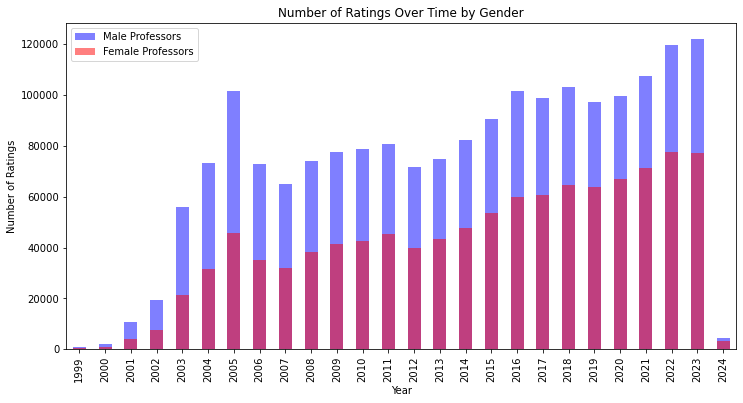

Average Ratings by Male Professors Over Time:
 date_Rating
1999         NaN
2000         NaN
2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009         NaN
2010         NaN
2011         NaN
2012         NaN
2013         NaN
2014         NaN
2015         NaN
2016    0.709951
2017    0.714891
2018    0.722024
2019    0.683392
2020    0.658387
2021    0.645994
2022    0.936635
2023    0.999927
2024    0.999336
Name: wouldTakeAgain_Rating, dtype: float64

Average Ratings by Female Professors Over Time:
 date_Rating
1999         NaN
2000         NaN
2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009         NaN
2010         NaN
2011         NaN
2012         NaN
2013         NaN
2014         NaN
2015         NaN
2016    0.690952
2017    0.697817
2018    0.701445
2019    0.654407
2020    0.635367
2021    0.625112
20

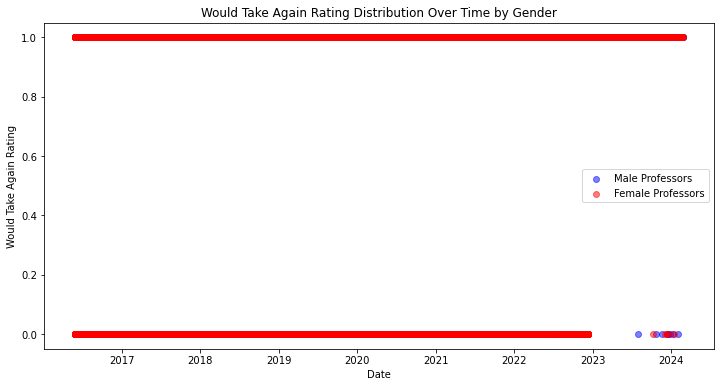

In [22]:
import matplotlib.pyplot as plt


male_df = df[df['predictedGender'] == 'Male']

female_df = df[df['predictedGender'] == 'Female']

# Plotting Trends Over Time for Male Professors
plt.figure(figsize=(12, 6))
male_df['date_Rating'].dt.year.value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.5, label='Male Professors')
female_df['date_Rating'].dt.year.value_counts().sort_index().plot(kind='bar', color='red', alpha=0.5, label='Female Professors')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings Over Time by Gender')
plt.legend()
plt.show()

# Calculating Average Ratings Over Time Intervals for Male Professors
average_ratings_male = male_df.groupby(male_df['date_Rating'].dt.year)['wouldTakeAgain_Rating'].mean()
print("Average Ratings by Male Professors Over Time:\n", average_ratings_male)

# Calculating Average Ratings Over Time Intervals for Female Professors
average_ratings_female = female_df.groupby(female_df['date_Rating'].dt.year)['wouldTakeAgain_Rating'].mean()
print("\nAverage Ratings by Female Professors Over Time:\n", average_ratings_female)

# Analyzing Ratings Distribution Over Time for Male Professors
plt.figure(figsize=(12, 6))
plt.scatter(male_df['date_Rating'], male_df['wouldTakeAgain_Rating'], alpha=0.5, color='blue', label='Male Professors')
plt.scatter(female_df['date_Rating'], female_df['wouldTakeAgain_Rating'], alpha=0.5, color='red', label='Female Professors')
plt.xlabel('Date')
plt.ylabel('Would Take Again Rating')
plt.title('Would Take Again Rating Distribution Over Time by Gender')
plt.legend()
plt.show()


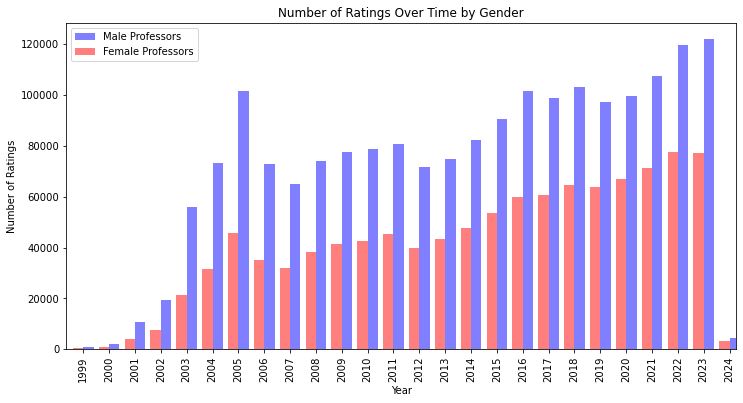

In [23]:
import matplotlib.pyplot as plt

# Plotting Trends Over Time for Male and Female Professors
plt.figure(figsize=(12, 6))
male_counts = male_df['date_Rating'].dt.year.value_counts().sort_index()
female_counts = female_df['date_Rating'].dt.year.value_counts().sort_index()
male_counts.plot(kind='bar', color='blue', alpha=0.5, position=0, width=0.4, label='Male Professors')
female_counts.plot(kind='bar', color='red', alpha=0.5, position=1, width=0.4, label='Female Professors')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings Over Time by Gender')
plt.legend()
plt.show()


In [24]:
# Filter the DataFrame for ratings after 2020 and considering isForOnlineClass_Rating
filtered_df = df[(df['date_Rating'].dt.year > 2020) & df['isForOnlineClass_Rating']]

# Calculate the average "would take again" rating
average_rating = filtered_df['wouldTakeAgain_Rating'].mean()
print("Average Would Take Again Rating for Ratings after 2020 and for Online Classes:", average_rating)

Average Would Take Again Rating for Ratings after 2020 and for Online Classes: 0.7341620796998372


In [25]:
# Filter the DataFrame for ratings after 2020 and considering isForOnlineClass_Rating
filtered_df = df[(df['date_Rating'].dt.year < 2020) & df['isForOnlineClass_Rating']]

# Calculate the average "would take again" rating
average_rating = filtered_df['wouldTakeAgain_Rating'].mean()
print("Average Would Take Again Rating for Ratings before 2020 and for Online Classes:", average_rating)

Average Would Take Again Rating for Ratings before 2020 and for Online Classes: 0.6370050195203569


In [26]:
# Filter the DataFrame for ratings from 2020 to 2022
filtered_df = df[(df['date_Rating'].dt.year >= 2020) & (df['date_Rating'].dt.year <= 2022)]

# Group by year and class type
grouped_df = filtered_df.groupby([filtered_df['date_Rating'].dt.year, 'isForOnlineClass_Rating'])

# Calculate the average "would take again" score for each group
average_scores = grouped_df['wouldTakeAgain_Rating'].mean()

# Display the results for each year separately
for year in [2020, 2021, 2022]:
    print(f"Year {year}:")
    print(average_scores[year])
    print("\n")

Year 2020:
isForOnlineClass_Rating
False    0.661338
True     0.618997
Name: wouldTakeAgain_Rating, dtype: float64


Year 2021:
isForOnlineClass_Rating
False    0.647924
True     0.618656
Name: wouldTakeAgain_Rating, dtype: float64


Year 2022:
isForOnlineClass_Rating
False    0.935913
True     0.903737
Name: wouldTakeAgain_Rating, dtype: float64




<Figure size 1152x576 with 0 Axes>

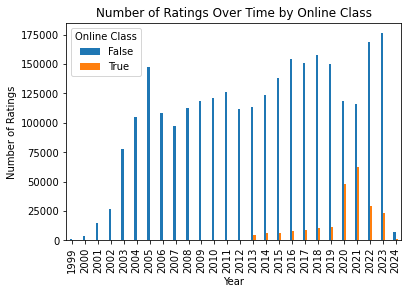

In [27]:
import matplotlib.pyplot as plt

# Group the data by year and isForOnlineClass_Rating and count the occurrences
online_class_counts = df.groupby([df['date_Rating'].dt.year, 'isForOnlineClass_Rating']).size().unstack()

# Set the figure size
plt.figure(figsize=(16, 8))  # Increase the figure size

# Get the number of unique years for positioning the bars
num_years = len(online_class_counts.index)

# Plot the count of isForOnlineClass_Rating over time
online_class_counts.plot(kind='bar', width=0.35)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings Over Time by Online Class')
plt.legend(title='Online Class')

# Adjust x-axis ticks for better visibility
plt.xticks(range(num_years), online_class_counts.index)

# Show the plot
plt.show()

<Figure size 864x432 with 0 Axes>

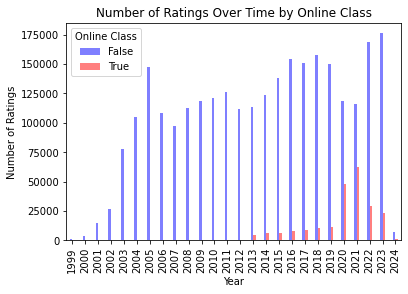

In [28]:
import matplotlib.pyplot as plt

# Group the data by year and isForOnlineClass_Rating and count the occurrences
online_class_counts = df.groupby([df['date_Rating'].dt.year, 'isForOnlineClass_Rating']).size().unstack()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the count of ratings over time by isForOnlineClass_Rating
online_class_counts.plot(kind='bar', color=['blue', 'red'], alpha=0.5, width=0.4)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings Over Time by Online Class')
plt.legend(title='Online Class')

# Show the plot
plt.show()


<Figure size 864x432 with 0 Axes>

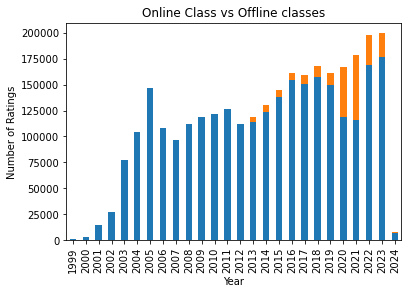

In [29]:
import matplotlib.pyplot as plt

# Group the data by year and isForOnlineClass_Rating and count the occurrences
online_class_counts = df.groupby([df['date_Rating'].dt.year, 'isForOnlineClass_Rating']).size().unstack()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the count of isForOnlineClass_Rating over time
online_class_counts.plot(kind='bar', stacked=True, legend = False)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Online Class vs Offline classes')

# Show the plot
plt.show()


<Figure size 864x432 with 0 Axes>

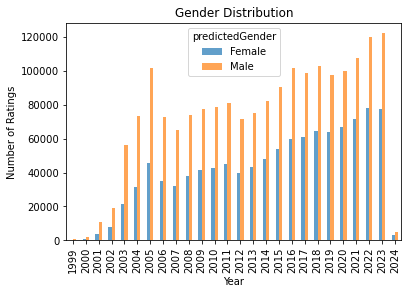

In [30]:
import matplotlib.pyplot as plt

# Group the data by year and gender and count the occurrences
gender_counts = df.groupby([df['date_Rating'].dt.year, 'predictedGender']).size().unstack()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the count of ratings over time by gender
gender_counts.plot(kind='bar', alpha=0.7)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Gender Distribution')

# Show the plot
plt.show()


In [31]:
import pandas as pd

# Group the data by year and gender and count the occurrences
gender_counts = df.groupby([df['date_Rating'].dt.year, 'predictedGender']).size().unstack()

# Display the counts as a table
print("Gender Distribution Over Time:")
print(gender_counts)


Gender Distribution Over Time:
predictedGender  Female    Male
date_Rating                    
1999                428    1010
2000               1051    2234
2001               3961   10836
2002               7586   19233
2003              21265   56132
2004              31528   73187
2005              45690  101474
2006              35265   72957
2007              31920   65093
2008              38154   74122
2009              41357   77615
2010              42435   78764
2011              45290   80905
2012              39933   71783
2013              43443   74862
2014              47801   82194
2015              53751   90556
2016              60043  101583
2017              60738   98941
2018              64685  103099
2019              63870   97474
2020              66955   99679
2021              71313  107323
2022              77782  119740
2023              77288  122199
2024               3146    4630


In [32]:
import pandas as pd

# Group the data by year and gender and count the occurrences
gender_counts = df.groupby([df['date_Rating'].dt.year, 'predictedGender']).size().unstack()

# Calculate the total count of ratings for each year
total_counts = gender_counts.sum(axis=1)

# Calculate the percentage of male and female ratings relative to the total count
percentage_male = (gender_counts['Male'] / total_counts) * 100
percentage_female = (gender_counts['Female'] / total_counts) * 100

# Add the percentage columns to the gender_counts DataFrame
gender_counts['Percentage Male'] = percentage_male
gender_counts['Percentage Female'] = percentage_female

# Display the counts and percentages as a table
print("Gender Distribution Over Time (with Percentage):")
print(gender_counts)


Gender Distribution Over Time (with Percentage):
predictedGender  Female    Male  Percentage Male  Percentage Female
date_Rating                                                        
1999                428    1010        70.236439          29.763561
2000               1051    2234        68.006088          31.993912
2001               3961   10836        73.231060          26.768940
2002               7586   19233        71.714083          28.285917
2003              21265   56132        72.524775          27.475225
2004              31528   73187        69.891611          30.108389
2005              45690  101474        68.953005          31.046995
2006              35265   72957        67.414204          32.585796
2007              31920   65093        67.097193          32.902807
2008              38154   74122        66.017671          33.982329
2009              41357   77615        65.238039          34.761961
2010              42435   78764        64.987335          35.012665

In [33]:
import pandas as pd

# Group the data by year and predicted gender and calculate the average "would take again" rating for each year
would_take_again_avg = df.groupby([df['date_Rating'].dt.year, 'predictedGender'])['wouldTakeAgain_Rating'].mean()

# Reshape the data to have years as rows and genders as columns
would_take_again_avg = would_take_again_avg.unstack()

# Display the average "would take again" rating for each year by gender
print("Average Would Take Again Rating Over Time by Gender:")
print(would_take_again_avg)


Average Would Take Again Rating Over Time by Gender:
predictedGender    Female      Male
date_Rating                        
1999                  NaN       NaN
2000                  NaN       NaN
2001                  NaN       NaN
2002                  NaN       NaN
2003                  NaN       NaN
2004                  NaN       NaN
2005                  NaN       NaN
2006                  NaN       NaN
2007                  NaN       NaN
2008                  NaN       NaN
2009                  NaN       NaN
2010                  NaN       NaN
2011                  NaN       NaN
2012                  NaN       NaN
2013                  NaN       NaN
2014                  NaN       NaN
2015                  NaN       NaN
2016             0.690952  0.709951
2017             0.697817  0.714891
2018             0.701445  0.722024
2019             0.654407  0.683392
2020             0.635367  0.658387
2021             0.625112  0.645994
2022             0.923027  0.936635
2023       

In [34]:
import pandas as pd

# Filter the data for Asian professors
asian_df = df[df['AsianProfessor'] == 'Yes']

# Group the filtered data by year and predicted gender and calculate the average "would take again" rating for each year
would_take_again_avg_asian = asian_df.groupby([asian_df['date_Rating'].dt.year, 'predictedGender'])['wouldTakeAgain_Rating'].mean()

# Reshape the data to have years as rows and genders as columns
would_take_again_avg_asian = would_take_again_avg_asian.unstack()

# Display the average "would take again" rating for Asian professors for each year by gender
print("Average Would Take Again Rating Over Time for Asian Professors by Gender:")
print(would_take_again_avg_asian)



Average Would Take Again Rating Over Time for Asian Professors by Gender:
predictedGender    Female      Male
date_Rating                        
1999                  NaN       NaN
2000                  NaN       NaN
2001                  NaN       NaN
2002                  NaN       NaN
2003                  NaN       NaN
2004                  NaN       NaN
2005                  NaN       NaN
2006                  NaN       NaN
2007                  NaN       NaN
2008                  NaN       NaN
2009                  NaN       NaN
2010                  NaN       NaN
2011                  NaN       NaN
2012                  NaN       NaN
2013                  NaN       NaN
2014                  NaN       NaN
2015                  NaN       NaN
2016             0.662439  0.708164
2017             0.699247  0.704438
2018             0.691194  0.704206
2019             0.657154  0.672976
2020             0.637702  0.650109
2021             0.620076  0.646021
2022             0.918335 

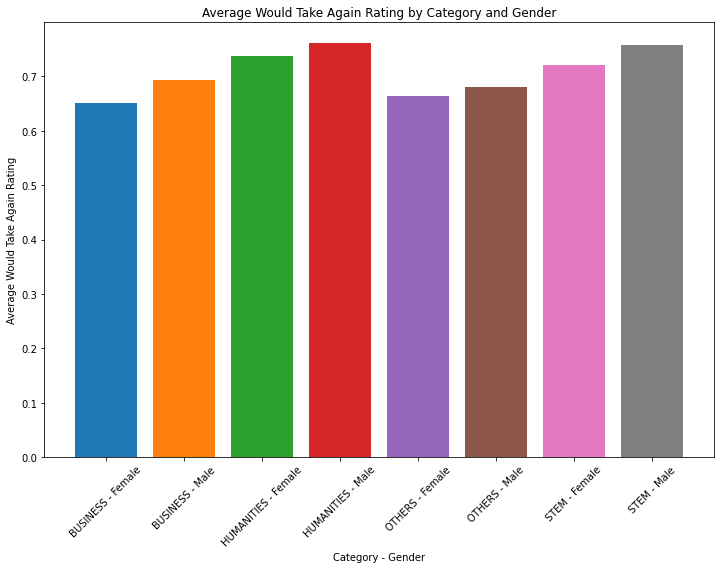

In [35]:
# Filter the dataset to include only records with non-null 'Predicted_Category', 'wouldTakeAgain_Rating', 'Gender', and 'AsianProfessor'
filtered_df = df.dropna(subset=['Predicted_Category', 'wouldTakeAgain_Rating', 'predictedGender'])

# Group by predicted category, gender, and calculate the mean 'wouldTakeAgain_Rating' for each group
category_gender_avg_rating = filtered_df.groupby(['Predicted_Category', 'predictedGender'])['wouldTakeAgain_Rating'].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over each predicted category and gender combination
for category, gender in category_gender_avg_rating.index:
    avg_rating = category_gender_avg_rating.loc[(category, gender)]
    ax.bar(f'{category} - {gender}', avg_rating)

ax.set_xlabel('Category - Gender')
ax.set_ylabel('Average Would Take Again Rating')
ax.set_title('Average Would Take Again Rating by Category and Gender')
plt.xticks(rotation=45)
plt.show()


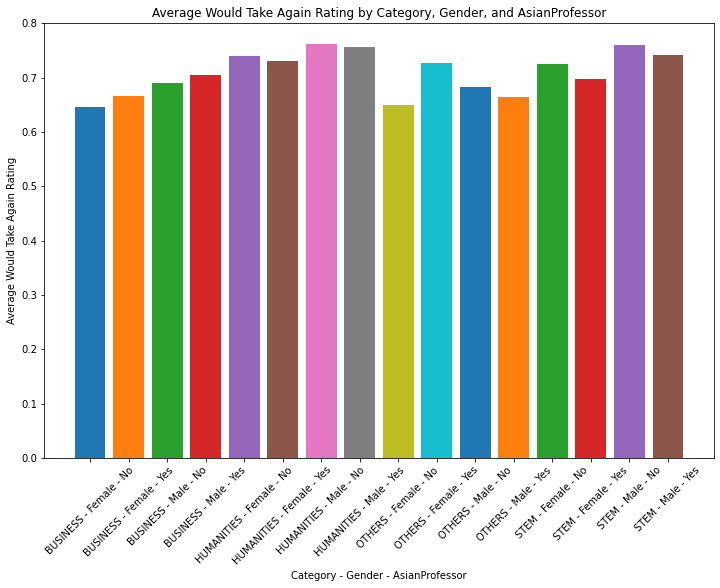

In [36]:
# Filter the dataset to include only records with non-null 'Predicted_Category', 'wouldTakeAgain_Rating', 'Gender', and 'AsianProfessor'
filtered_df = df.dropna(subset=['Predicted_Category', 'wouldTakeAgain_Rating', 'predictedGender', 'AsianProfessor'])

# Group by predicted category, gender, AsianProfessor and calculate the mean 'wouldTakeAgain_Rating' for each group
category_gender_asian_avg_rating = filtered_df.groupby(['Predicted_Category', 'predictedGender', 'AsianProfessor'])['wouldTakeAgain_Rating'].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over each predicted category, gender, and AsianProfessor combination
for category, gender, asian in category_gender_asian_avg_rating.index:
    avg_rating = category_gender_asian_avg_rating.loc[(category, gender, asian)]
    ax.bar(f'{category} - {gender} - {asian}', avg_rating)

ax.set_xlabel('Category - Gender - AsianProfessor')
ax.set_ylabel('Average Would Take Again Rating')
ax.set_title('Average Would Take Again Rating by Category, Gender, and AsianProfessor')
plt.xticks(rotation=45)
plt.show()


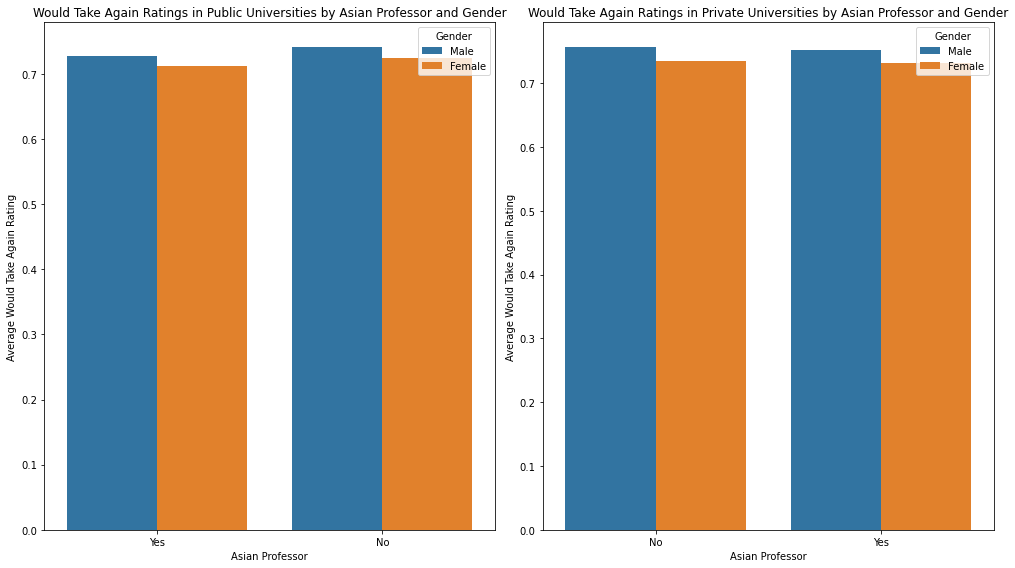

In [37]:
plt.figure(figsize=(14, 8))

# Plot for public universities
plt.subplot(1, 2, 1)
sns.barplot(data=df[df['University_Category'] == 'Public'], x='AsianProfessor', y='wouldTakeAgain_Rating', hue='predictedGender', ci=None)
plt.title('Would Take Again Ratings in Public Universities by Asian Professor and Gender')
plt.xlabel('Asian Professor')
plt.ylabel('Average Would Take Again Rating')
plt.legend(title='Gender')

# Plot for private universities
plt.subplot(1, 2, 2)
sns.barplot(data=df[df['University_Category'] == 'Private'], x='AsianProfessor', y='wouldTakeAgain_Rating', hue='predictedGender', ci=None)
plt.title('Would Take Again Ratings in Private Universities by Asian Professor and Gender')
plt.xlabel('Asian Professor')
plt.ylabel('Average Would Take Again Rating')
plt.legend(title='Gender')

plt.tight_layout()
plt.show()


In [38]:
df_teacher_notes = df[["ProfessorName","teacherNote_Rating","comment_Rating"]]
df_teacher_notes.dropna(inplace=True)

/var/folders/jk/26c0nrvd30sbw9k4_2ns250c0000gn/T/ipykernel_75032/1020961077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teacher_notes.dropna(inplace=True)


In [39]:
df_teacher_notes.head(10)

,ProfessorName,teacherNote_Rating,comment_Rating
2561,Dan Lewis,{'comment': 'Sorry that you felt this way. Wo...,unclear assignments and lots of reading lectur...
46122,Adriana de Souza e Silva,"{'comment': 'To clarify, there is just one art...",in my four years at nc state university she is...
47366,John Kuzenski,{'comment': 'Many students feel the opposite w...,i understand when professors lecture harder ma...
47375,John Kuzenski,{'comment': 'Students with known *documented* ...,i let this guy know that i was dealing with pe...
47376,John Kuzenski,{'comment': 'I know students that are failing ...,a class that gives students too much grief wit...
47380,John Kuzenski,{'comment': 'Strict? Because I tell everybody ...,i graduating this semester and just stopping b...
47383,John Kuzenski,{'comment': 'Good luck in the home stretch and...,is this class hard absolutely be prepared to p...
47384,John Kuzenski,{'comment': 'Please don’t mislead! Exam study ...,professor k is by far the worst professor i ev...
47385,John Kuzenski,"{'comment': 'RIP! How dramatic! Scary, even! L...",imagine you walk into a class where the profes...
47388,John Kuzenski,{'comment': 'Asked two TAs today if they remem...,he is a sophist if you read some of his respon...


In [40]:
# Filter the DataFrame to include only comments for Professor John Kuzenski
john_kuzenski_comments = df_teacher_notes[df_teacher_notes['ProfessorName'] == 'John Kuzenski'][['comment_Rating', 'teacherNote_Rating']]

# Display all the comments for Professor John Kuzenski
print("Professor John Kuzenski:")
for index, row in john_kuzenski_comments.iterrows():
    print("Comment Rating:", row['comment_Rating'])
    print("Teacher Note Rating:", row['teacherNote_Rating'])
    print()


Professor John Kuzenski:
Comment Rating: i understand when professors lecture harder material given the course difficulty however this professor makes it impossible to feel that he wants you to genuinely does not care if you pass or not and makes it more difficult by being the only professor for this mandatory course and denying the ability to take this course elsewhere
Teacher Note Rating: {'comment': 'Many students feel the opposite way, and take advantage of resources I provide to help them succeed- which is my ultimate goal. “Genuinely does not care?” Based on what evidence? Have you sought help, read carefully, met deadlines? “Denying the ability…”- I don’t control that. It’s a college policy. Accusations based on emotion= not constructive. ', 'createdAt': '2022-03-28 08:56:26 +0000 UTC', 'flagStatus': 'REVIEWED', 'id': 'VGVhY2hlck5vdGVzLTEzNjIy', 'legacyId': 13622, 'teacherId': '894586', 'updatedAt': '2022-03-28 08:56:26 +0000 UTC'}

Comment Rating: i let this guy know that i was

In [41]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer


sia = SentimentIntensityAnalyzer()

def calculate_sentiment_score(comment):
    return sia.polarity_scores(str(comment))['compound']

df_teacher_notes['TeacherNote_Sentiment_Score'] = df_teacher_notes['teacherNote_Rating'].apply(calculate_sentiment_score)
df_teacher_notes['Comment_Sentiment_Score'] = df_teacher_notes['comment_Rating'].apply(calculate_sentiment_score)

most_negative_teacher_comments = df_teacher_notes.sort_values(by='TeacherNote_Sentiment_Score', ascending=True)[['teacherNote_Rating', 'TeacherNote_Sentiment_Score']].head(10)

print("Top 10 most negative teacher comments:")
for index, row in most_negative_teacher_comments.iterrows():
    print("Teacher Rating:", row['teacherNote_Rating'])
    print("Sentiment Score:", row['TeacherNote_Sentiment_Score'])
    print()

most_negative_comments = df_teacher_notes.sort_values(by='Comment_Sentiment_Score', ascending=True)[['comment_Rating', 'Comment_Sentiment_Score']].head(10)

print("\nTop 10 most negative comments:")
for index, row in most_negative_comments.iterrows():
    print("Comment Rating:", row['comment_Rating'])
    print("Sentiment Score:", row['Comment_Sentiment_Score'])
    print()

/var/folders/jk/26c0nrvd30sbw9k4_2ns250c0000gn/T/ipykernel_75032/829503396.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teacher_notes['TeacherNote_Sentiment_Score'] = df_teacher_notes['teacherNote_Rating'].apply(calculate_sentiment_score)


Top 10 most negative teacher comments:
Teacher Rating: {'comment': 'Understandably, students not earning a good grade are likely to blame the professor for something. The grading criteria is on every syllabus, as required, so perhaps this student just didn&#39;t read it.  It was there, as any other student enrolled in this course in 2019 would attest.  All assignments had a grading rubric, which shows how students will earn their grade for the assignment, so perhaps the student didn&#39;t see this either. Again, any other student enrolled in this course in 2019 would attest.to this. I also leave many comments on papers. Many students don&#39;t seem to read the comments, which results in their repeating the same mistakes that they got on the previous assignments.  \n\nIn spite of the complaints based on misinformation from a couple of students out of the whole class-- that there is too much homework and too many papers--most rose to meet the challenge that higher expectations are meant 

/var/folders/jk/26c0nrvd30sbw9k4_2ns250c0000gn/T/ipykernel_75032/829503396.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teacher_notes['Comment_Sentiment_Score'] = df_teacher_notes['comment_Rating'].apply(calculate_sentiment_score)


In [7]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

first_3_years_data = df[df['date_Rating'].dt.year <= df['date_Rating'].dt.year.min() + 2]
last_3_years_data = df[df['date_Rating'].dt.year >= df['date_Rating'].dt.year.max() - 2]

first_3_years_comments = ' '.join(first_3_years_data['comment_Rating'].dropna())
last_3_years_comments = ' '.join(last_3_years_data['comment_Rating'].dropna())


vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform([first_3_years_comments])
vocab = vectorizer.get_feature_names()
word_freq = Counter(dict(zip(vocab, X.toarray()[0])))


print("Top 10 most common words for the first 3 years:")
print(word_freq.most_common(10))


vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform([last_3_years_comments])
vocab = vectorizer.get_feature_names()
word_freq = Counter(dict(zip(vocab, X.toarray()[0])))


print("\nTop 10 most common words for the last 3 years:")
print(word_freq.most_common(10))


AttributeError: Can only use .dt accessor with datetimelike values

In [43]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

first_3_years_data = df[df['date_Rating'].dt.year <= df['date_Rating'].dt.year.min() + 2]
last_3_years_data = df[df['date_Rating'].dt.year >= df['date_Rating'].dt.year.max() - 2]

first_3_years_comments = ' '.join(first_3_years_data['comment_Rating'].dropna())
last_3_years_comments = ' '.join(last_3_years_data['comment_Rating'].dropna())

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform([first_3_years_comments])
vocab = vectorizer.get_feature_names()
word_freq_first_3_years = Counter(dict(zip(vocab, X.toarray()[0])))

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform([last_3_years_comments])
vocab = vectorizer.get_feature_names()
word_freq_last_3_years = Counter(dict(zip(vocab, X.toarray()[0])))

word_freq_difference = word_freq_last_3_years - word_freq_first_3_years

print("Top 10 words from the first 3 years to the last 3 years:")
print(word_freq_difference.most_common(10))


Top 10 words from the first 3 years to the last 3 years:
[('class', 377744), ('professor', 175335), ('lectures', 108727), ('easy', 86745), ('students', 84380), ('exams', 74504), ('really', 73045), ('great', 68808), ('good', 67363), ('does', 64145)]


In [44]:
df_teacher_notes['ProfessorName'].nunique()

169

In [45]:
word = "mask"

count = 0
for index, row in df.iterrows():
    comment = row['comment_Rating']
    if isinstance(comment, str) and word in comment.lower():
        print("comment:", comment)
        count = count + 1

comment: reads straight from the slides clearly not knowledgeable about the class she masks her lack of knowledge by picking out quot key words quot on test that you do include so that not everyone gets an homework varies i hope you good at reading textbooks because they a much better teacher then she is ca believe professors like her exist
comment: constantly makes mistakes and lecture notes are illegible is still using a mask which would be a problem if it were not for the fact that his english is rough and he barely speaks up nice guy but he should not be teaching this course
comment: she very meticulous with her explaining and if you can focus and practice you do great if you tired however you are prone to start dozing off because she not quite monotonous but very calm in tone her examples are the best and be sure to follow her requirements mask up no laptops tablets are allowed noise to a minimum etc
comment: he is not good at teaching in flipped format he too far above us intelle

In [46]:
print(count)

651


In [47]:
word = "flirt"

count = 0
for index, row in df.iterrows():
    comment = row['comment_Rating']
    if isinstance(comment, str) and word in comment.lower():
        print("comment:", comment)
        count = count + 1

comment: really really nice and actually interesting easy to get at least a b offers extra credit young and kind of cute too flirty
comment: class is easy test and a group project rojek who is like flirts with all the girls in the class
comment: he a pretty easy teacher we had moodle quizzes that were all super easy we had cycling tests and if you miss a class it wo kill you he is kind of creepy though he flirts with these girls in my class every day and he he talks about really strange things but the class was very hard so it balanced out
comment: lighten up on the guy he old just flirt with him and you get through it
comment: i had a hard time at first but i learned from my buddy david that she a bit ethnocentric and has a tendency to grade easier on british students especially white guys after a few flirtatious visits to her office she let me skate by easily just charm her well enough and all is golden
comment: she picks favorites guys will have a better chance in her class if they 

In [48]:
print(count)

201


In [49]:
# Filter the DataFrame to include only comments for Professor John Kuzenski
john_kuzenski_comments = df_teacher_notes[df_teacher_notes['ProfessorName'] == 'John Kuzenski'][['comment_Rating', 'teacherNote_Rating']]

# Display all the comments for Professor John Kuzenski
print("Professor John Kuzenski:")
for index, row in john_kuzenski_comments.iterrows():
    print("Comment Rating:", row['comment_Rating'])
    print("Teacher Note Rating:", row['teacherNote_Rating'])
    print()


Professor John Kuzenski:
Comment Rating: i understand when professors lecture harder material given the course difficulty however this professor makes it impossible to feel that he wants you to genuinely does not care if you pass or not and makes it more difficult by being the only professor for this mandatory course and denying the ability to take this course elsewhere
Teacher Note Rating: {'comment': 'Many students feel the opposite way, and take advantage of resources I provide to help them succeed- which is my ultimate goal. “Genuinely does not care?” Based on what evidence? Have you sought help, read carefully, met deadlines? “Denying the ability…”- I don’t control that. It’s a college policy. Accusations based on emotion= not constructive. ', 'createdAt': '2022-03-28 08:56:26 +0000 UTC', 'flagStatus': 'REVIEWED', 'id': 'VGVhY2hlck5vdGVzLTEzNjIy', 'legacyId': 13622, 'teacherId': '894586', 'updatedAt': '2022-03-28 08:56:26 +0000 UTC'}

Comment Rating: i let this guy know that i was

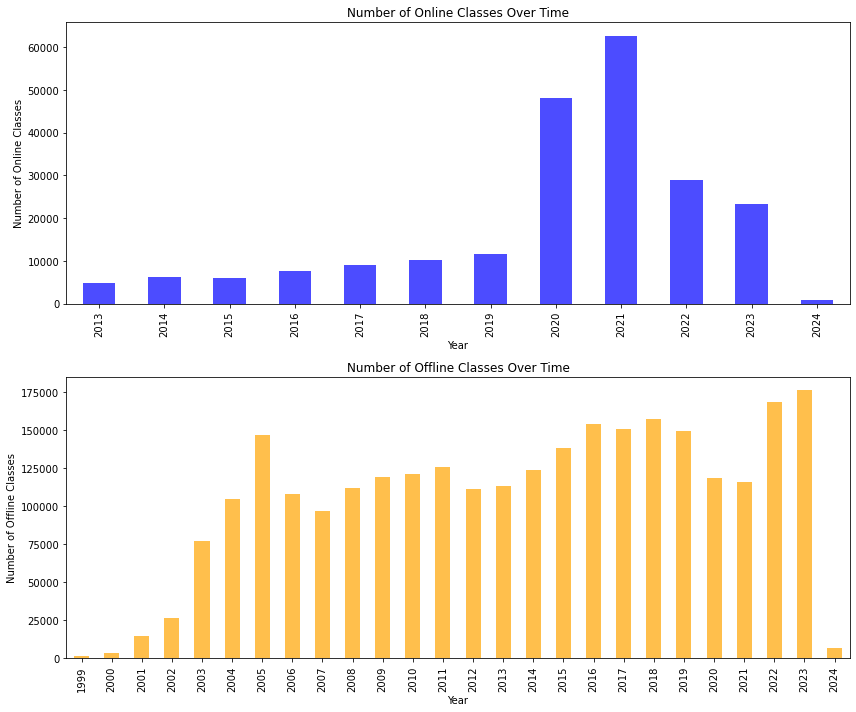

In [50]:
import matplotlib.pyplot as plt

# Filter the DataFrame for online classes
online_classes = df[df['isForOnlineClass_Rating'] == True]

# Filter the DataFrame for offline classes
offline_classes = df[df['isForOnlineClass_Rating'] == False]

# Set up the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot the count of online classes over time
online_classes['date_Rating'].dt.year.value_counts().sort_index().plot(kind='bar', ax=axs[0], color='blue', alpha=0.7)
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Online Classes')
axs[0].set_title('Number of Online Classes Over Time')

# Plot the count of offline classes over time
offline_classes['date_Rating'].dt.year.value_counts().sort_index().plot(kind='bar', ax=axs[1], color='orange', alpha=0.7)
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of Offline Classes')
axs[1].set_title('Number of Offline Classes Over Time')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

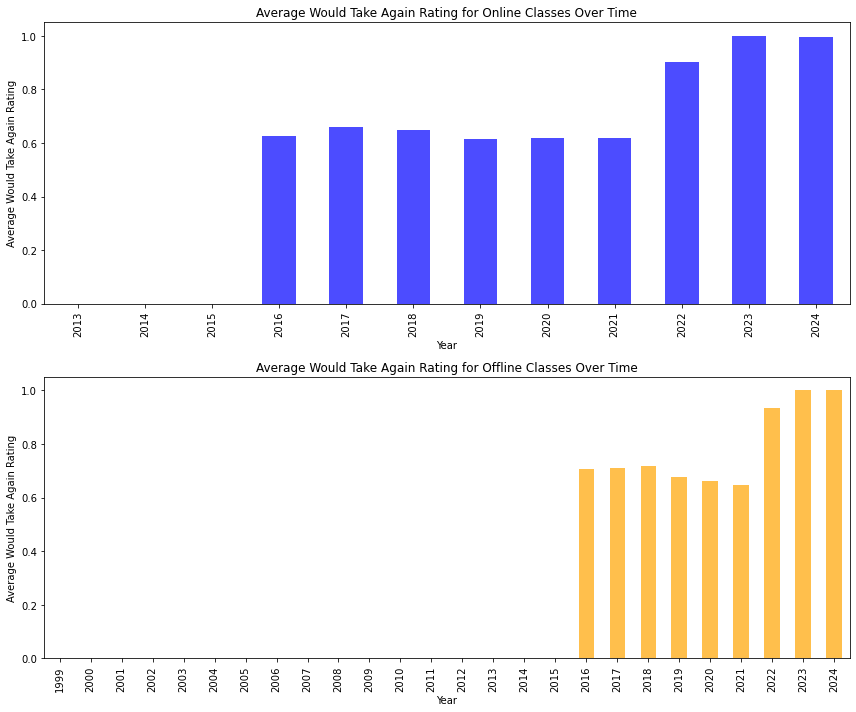

In [51]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot the would take again rating for online classes over time
online_classes.groupby(online_classes['date_Rating'].dt.year)['wouldTakeAgain_Rating'].mean().plot(kind='bar', ax=axs[0], color='blue', alpha=0.7)
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Average Would Take Again Rating')
axs[0].set_title('Average Would Take Again Rating for Online Classes Over Time')

# Plot the would take again rating for offline classes over time
offline_classes.groupby(offline_classes['date_Rating'].dt.year)['wouldTakeAgain_Rating'].mean().plot(kind='bar', ax=axs[1], color='orange', alpha=0.7)
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Average Would Take Again Rating')
axs[1].set_title('Average Would Take Again Rating for Offline Classes Over Time')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


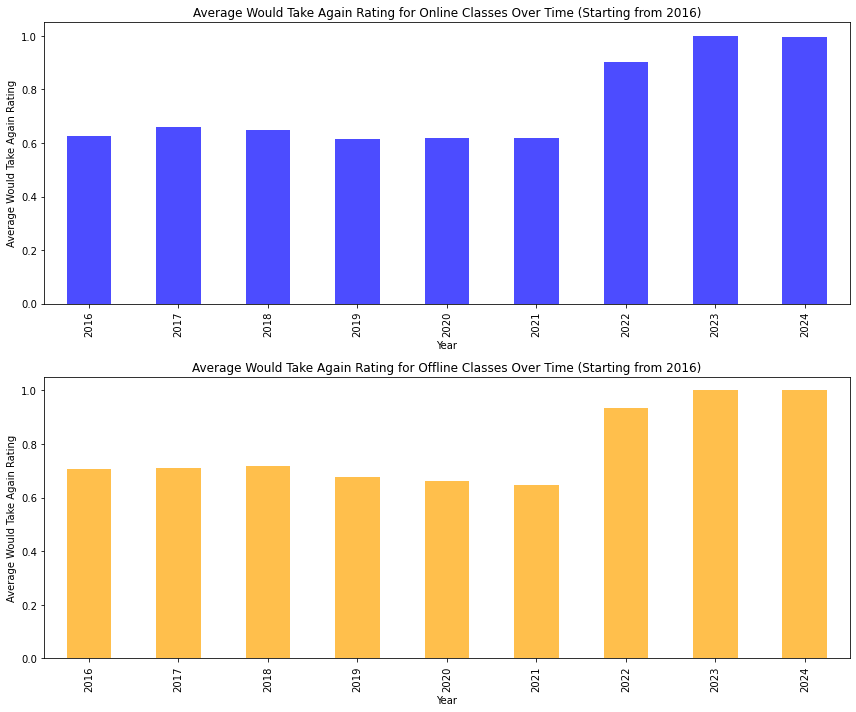

In [52]:
import matplotlib.pyplot as plt

# Filter the data for years starting from 2016
online_classes_2016 = online_classes[online_classes['date_Rating'].dt.year >= 2016]
offline_classes_2016 = offline_classes[offline_classes['date_Rating'].dt.year >= 2016]

# Set up the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot the would take again rating for online classes over time starting from 2016
online_classes_2016.groupby(online_classes_2016['date_Rating'].dt.year)['wouldTakeAgain_Rating'].mean().plot(kind='bar', ax=axs[0], color='blue', alpha=0.7)
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Average Would Take Again Rating')
axs[0].set_title('Average Would Take Again Rating for Online Classes Over Time (Starting from 2016)')

# Plot the would take again rating for offline classes over time starting from 2016
offline_classes_2016.groupby(offline_classes_2016['date_Rating'].dt.year)['wouldTakeAgain_Rating'].mean().plot(kind='bar', ax=axs[1], color='orange', alpha=0.7)
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Average Would Take Again Rating')
axs[1].set_title('Average Would Take Again Rating for Offline Classes Over Time (Starting from 2016)')

# Adjust layout
plt.tight_layout()


plt.show()


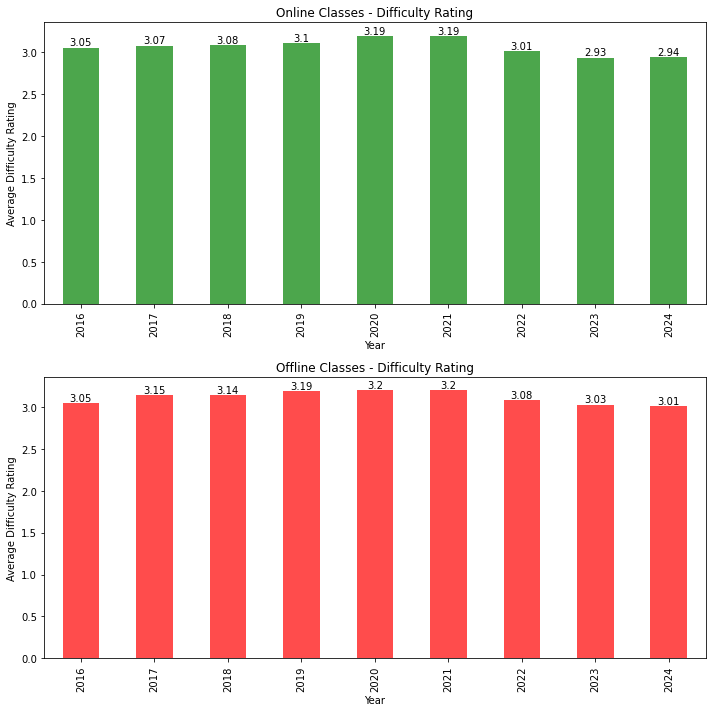

In [53]:
import matplotlib.pyplot as plt

# Filter the data for years starting from 2016
online_classes_2016 = online_classes[online_classes['date_Rating'].dt.year >= 2016]
offline_classes_2016 = offline_classes[offline_classes['date_Rating'].dt.year >= 2016]

# Set up the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the difficulty rating for online classes over time starting from 2016
online_avg_difficulty = online_classes_2016.groupby(online_classes_2016['date_Rating'].dt.year)['difficultyRating_Rating'].mean()
online_avg_difficulty.plot(kind='bar', ax=axs[0], color='green', alpha=0.7)
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Average Difficulty Rating')
axs[0].set_title('Online Classes - Difficulty Rating')
for i, val in enumerate(online_avg_difficulty):
    axs[0].text(i, val, round(val, 2), ha='center', va='bottom')

# Plot the difficulty rating for offline classes over time starting from 2016
offline_avg_difficulty = offline_classes_2016.groupby(offline_classes_2016['date_Rating'].dt.year)['difficultyRating_Rating'].mean()
offline_avg_difficulty.plot(kind='bar', ax=axs[1], color='red', alpha=0.7)
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Average Difficulty Rating')
axs[1].set_title('Offline Classes - Difficulty Rating')
for i, val in enumerate(offline_avg_difficulty):
    axs[1].text(i, val, round(val, 2), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


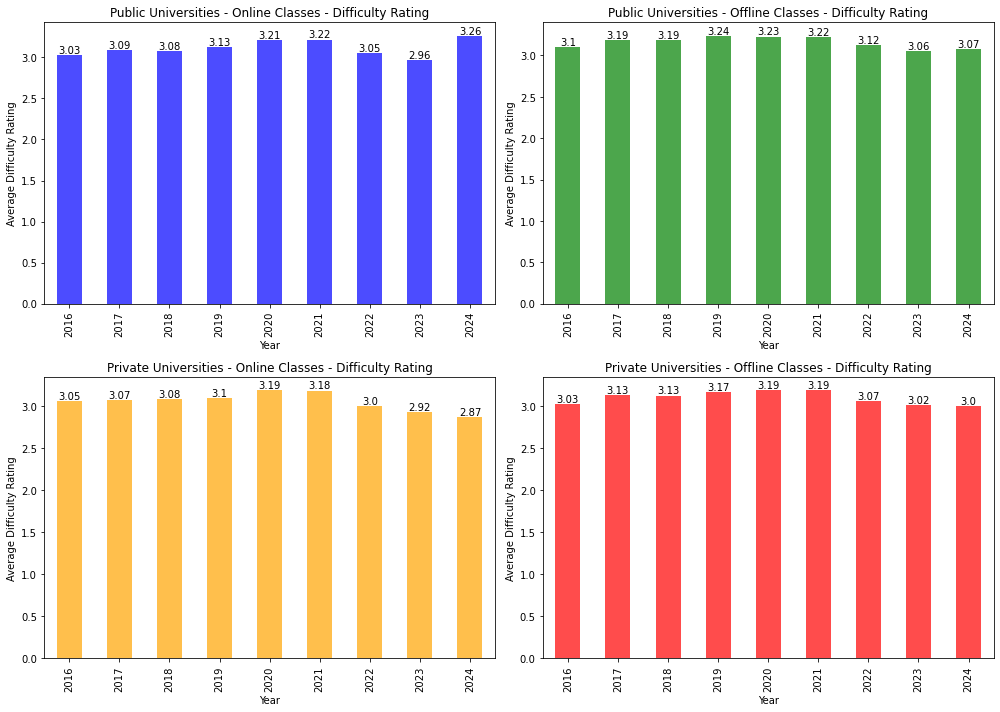

In [54]:
import matplotlib.pyplot as plt

# Filter the data for years starting from 2016 and for public universities
public_online_classes_2016 = online_classes[(online_classes['date_Rating'].dt.year >= 2016) & (online_classes['University_Category'] == 'Public')]
public_offline_classes_2016 = offline_classes[(offline_classes['date_Rating'].dt.year >= 2016) & (offline_classes['University_Category'] == 'Public')]

# Filter the data for years starting from 2016 and for private universities
private_online_classes_2016 = online_classes[(online_classes['date_Rating'].dt.year >= 2016) & (online_classes['University_Category'] == 'Private')]
private_offline_classes_2016 = offline_classes[(offline_classes['date_Rating'].dt.year >= 2016) & (offline_classes['University_Category'] == 'Private')]

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot the difficulty rating for online classes over time starting from 2016 for public universities
public_online_avg_difficulty = public_online_classes_2016.groupby(public_online_classes_2016['date_Rating'].dt.year)['difficultyRating_Rating'].mean()
public_online_avg_difficulty.plot(kind='bar', ax=axs[0, 0], color='blue', alpha=0.7)
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Average Difficulty Rating')
axs[0, 0].set_title('Public Universities - Online Classes - Difficulty Rating')
for i, val in enumerate(public_online_avg_difficulty):
    axs[0, 0].text(i, val, round(val, 2), ha='center', va='bottom')

# Plot the difficulty rating for offline classes over time starting from 2016 for public universities
public_offline_avg_difficulty = public_offline_classes_2016.groupby(public_offline_classes_2016['date_Rating'].dt.year)['difficultyRating_Rating'].mean()
public_offline_avg_difficulty.plot(kind='bar', ax=axs[0, 1], color='green', alpha=0.7)
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Average Difficulty Rating')
axs[0, 1].set_title('Public Universities - Offline Classes - Difficulty Rating')
for i, val in enumerate(public_offline_avg_difficulty):
    axs[0, 1].text(i, val, round(val, 2), ha='center', va='bottom')

# Plot the difficulty rating for online classes over time starting from 2016 for private universities
private_online_avg_difficulty = private_online_classes_2016.groupby(private_online_classes_2016['date_Rating'].dt.year)['difficultyRating_Rating'].mean()
private_online_avg_difficulty.plot(kind='bar', ax=axs[1, 0], color='orange', alpha=0.7)
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Average Difficulty Rating')
axs[1, 0].set_title('Private Universities - Online Classes - Difficulty Rating')
for i, val in enumerate(private_online_avg_difficulty):
    axs[1, 0].text(i, val, round(val, 2), ha='center', va='bottom')

# Plot the difficulty rating for offline classes over time starting from 2016 for private universities
private_offline_avg_difficulty = private_offline_classes_2016.groupby(private_offline_classes_2016['date_Rating'].dt.year)['difficultyRating_Rating'].mean()
private_offline_avg_difficulty.plot(kind='bar', ax=axs[1, 1], color='red', alpha=0.7)
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Average Difficulty Rating')
axs[1, 1].set_title('Private Universities - Offline Classes - Difficulty Rating')
for i, val in enumerate(private_offline_avg_difficulty):
    axs[1, 1].text(i, val, round(val, 2), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


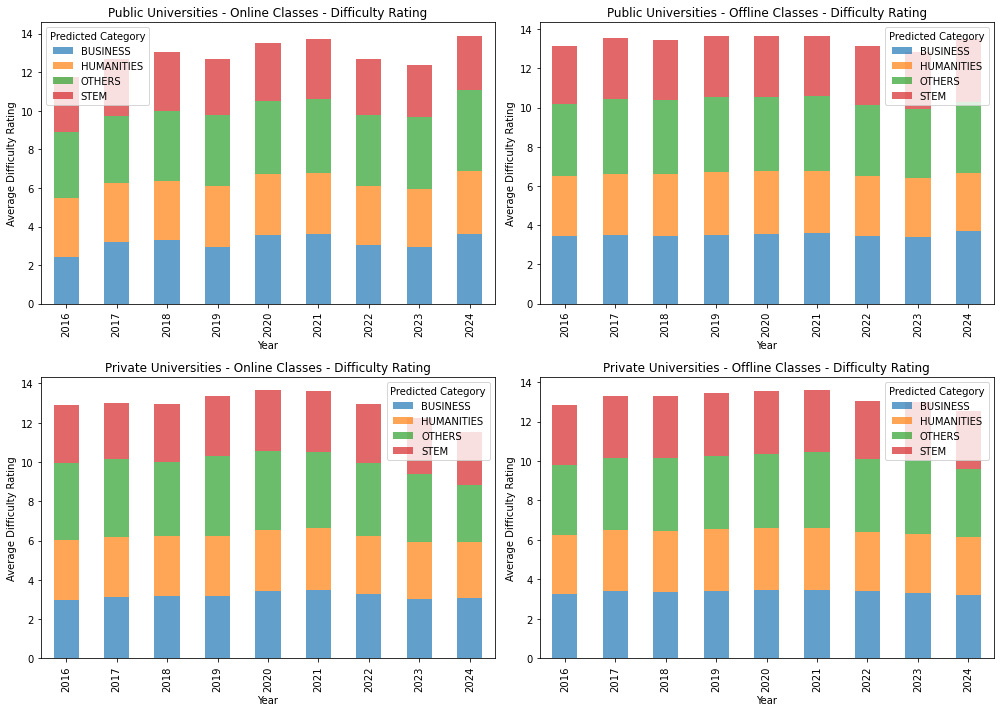

In [55]:
import matplotlib.pyplot as plt

# Filter the data for years starting from 2016 and for public universities
public_online_classes_2016 = online_classes[(online_classes['date_Rating'].dt.year >= 2016) & (online_classes['University_Category'] == 'Public')]
public_offline_classes_2016 = offline_classes[(offline_classes['date_Rating'].dt.year >= 2016) & (offline_classes['University_Category'] == 'Public')]

# Filter the data for years starting from 2016 and for private universities
private_online_classes_2016 = online_classes[(online_classes['date_Rating'].dt.year >= 2016) & (online_classes['University_Category'] == 'Private')]
private_offline_classes_2016 = offline_classes[(offline_classes['date_Rating'].dt.year >= 2016) & (offline_classes['University_Category'] == 'Private')]

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot the difficulty rating for online classes over time starting from 2016 for public universities
public_online_avg_difficulty = public_online_classes_2016.groupby([public_online_classes_2016['date_Rating'].dt.year, public_online_classes_2016['Predicted_Category']])['difficultyRating_Rating'].mean()
public_online_avg_difficulty.unstack().plot(kind='bar', ax=axs[0, 0], stacked=True, alpha=0.7)
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Average Difficulty Rating')
axs[0, 0].set_title('Public Universities - Online Classes - Difficulty Rating')
axs[0, 0].legend(title='Predicted Category')

# Plot the difficulty rating for offline classes over time starting from 2016 for public universities
public_offline_avg_difficulty = public_offline_classes_2016.groupby([public_offline_classes_2016['date_Rating'].dt.year, public_offline_classes_2016['Predicted_Category']])['difficultyRating_Rating'].mean()
public_offline_avg_difficulty.unstack().plot(kind='bar', ax=axs[0, 1], stacked=True, alpha=0.7)
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Average Difficulty Rating')
axs[0, 1].set_title('Public Universities - Offline Classes - Difficulty Rating')
axs[0, 1].legend(title='Predicted Category')

# Plot the difficulty rating for online classes over time starting from 2016 for private universities
private_online_avg_difficulty = private_online_classes_2016.groupby([private_online_classes_2016['date_Rating'].dt.year, private_online_classes_2016['Predicted_Category']])['difficultyRating_Rating'].mean()
private_online_avg_difficulty.unstack().plot(kind='bar', ax=axs[1, 0], stacked=True, alpha=0.7)
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Average Difficulty Rating')
axs[1, 0].set_title('Private Universities - Online Classes - Difficulty Rating')
axs[1, 0].legend(title='Predicted Category')

# Plot the difficulty rating for offline classes over time starting from 2016 for private universities
private_offline_avg_difficulty = private_offline_classes_2016.groupby([private_offline_classes_2016['date_Rating'].dt.year, private_offline_classes_2016['Predicted_Category']])['difficultyRating_Rating'].mean()
private_offline_avg_difficulty.unstack().plot(kind='bar', ax=axs[1, 1], stacked=True, alpha=0.7)
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Average Difficulty Rating')
axs[1, 1].set_title('Private Universities - Offline Classes - Difficulty Rating')
axs[1, 1].legend(title='Predicted Category')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


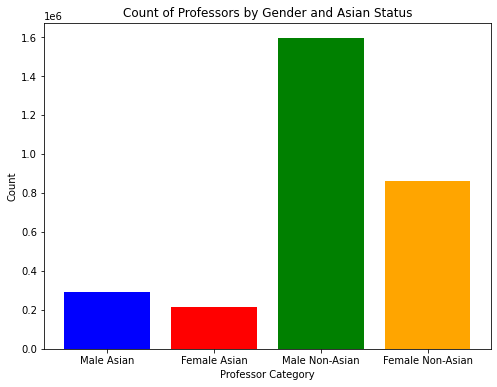

In [56]:
import matplotlib.pyplot as plt

male_asian_count = df[(df['predictedGender'] == 'Male') & (df['AsianProfessor'] == 'Yes')].shape[0]

female_asian_count = df[(df['predictedGender'] == 'Female') & (df['AsianProfessor'] == 'Yes')].shape[0]

male_non_asian_count = df[(df['predictedGender'] == 'Male') & (df['AsianProfessor'] == 'No')].shape[0]

female_non_asian_count = df[(df['predictedGender'] == 'Female') & (df['AsianProfessor'] == 'No')].shape[0]

categories = ['Male Asian', 'Female Asian', 'Male Non-Asian', 'Female Non-Asian']
counts = [male_asian_count, female_asian_count, male_non_asian_count, female_non_asian_count]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'red', 'green', 'orange'])

plt.xlabel('Professor Category')
plt.ylabel('Count')
plt.title('Count of Professors by Gender and Asian Status')

plt.show()


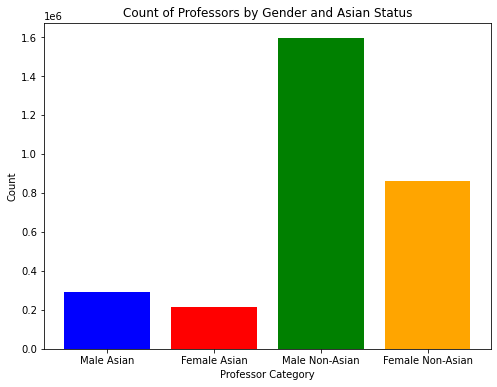

In [57]:
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'red', 'green', 'orange'])

plt.xlabel('Professor Category')
plt.ylabel('Count')
plt.title('Count of Professors by Gender and Asian Status')

plt.show()


In [58]:
online_count = df[df['isForOnlineClass_Rating'] == True].shape[0]
offline_count = df[df['isForOnlineClass_Rating'] == False].shape[0]

print("Number of online records:", online_count)
print("Number of offline records:", offline_count)


Number of online records: 219543
Number of offline records: 2744760


In [90]:
ratings = df[(df['date_Rating'].dt.year >= 2023) & (df['date_Rating'].dt.year <= 2023)]

num_ratings = ratings.shape[0]

print("Number of ratings:", num_ratings)

Number of ratings: 199487


In [89]:
ratings = df[df['date_Rating'].dt.year == 2023]

would_take_again = ratings[ratings['wouldTakeAgain_Rating'] == True].shape[0]

print("Number of 'would take again' ratings", would_take_again)


Number of 'would take again' ratings 132181


In [61]:
ratings = df[df['date_Rating'].dt.year == 2023]

would_take_again = ratings[ratings['wouldTakeAgain_Rating'] == False].shape[0]

print("Number of 'won't take again' ratings", would_take_again)

Number of 'won't take again' ratings 10


In [63]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [64]:
comments = df['comment_Rating'].dropna() 
tokenized_comments = [word_tokenize(comment.lower()) for comment in comments]
#stop word removal
stop_words = set(stopwords.words('english'))
filtered_comments = [[word for word in comment if word not in stop_words] for comment in tokenized_comments]

all_words = [word for comment in filtered_comments for word in comment]


word_freq = Counter(all_words)

most_common_words = word_freq.most_common(10)

print("Most common words in comments:")
for word, freq in most_common_words:
    print(f"{word}: {freq} occurrences")

Most common words in comments:
class: 2665719 occurrences
professor: 908892 occurrences
take: 709132 occurrences
easy: 637068 occurrences
really: 629347 occurrences
great: 539278 occurrences
lectures: 523928 occurrences
good: 507366 occurrences
tests: 502091 occurrences
students: 494762 occurrences


In [65]:
comments = ratings['comment_Rating'].dropna() 
tokenized_comments = [word_tokenize(comment.lower()) for comment in comments]
#stop word removal
stop_words = set(stopwords.words('english'))
filtered_comments = [[word for word in comment if word not in stop_words] for comment in tokenized_comments]

all_words = [word for comment in filtered_comments for word in comment]


word_freq = Counter(all_words)

most_common_words = word_freq.most_common(10)

print("Most common words in comments:")
for word, freq in most_common_words:
    print(f"{word}: {freq} occurrences")

Most common words in comments:
class: 186914 occurrences
professor: 86312 occurrences
lectures: 54089 occurrences
take: 47596 occurrences
easy: 43575 occurrences
students: 41617 occurrences
exams: 38257 occurrences
great: 34797 occurrences
really: 34645 occurrences
good: 33861 occurrences


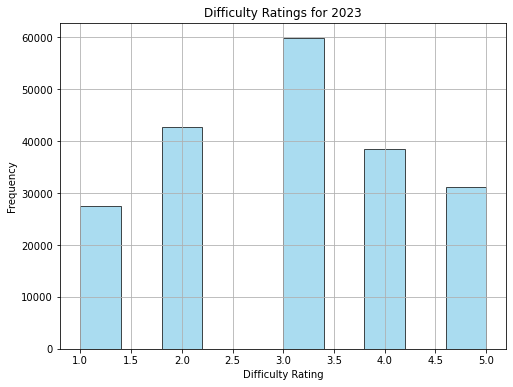

In [66]:
data_2023 = df[df['date_Rating'].dt.year == 2023]
difficulty_2023 = data_2023['difficultyRating_Rating']

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(difficulty_2023, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Difficulty Ratings for 2023')
plt.xlabel('Difficulty Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

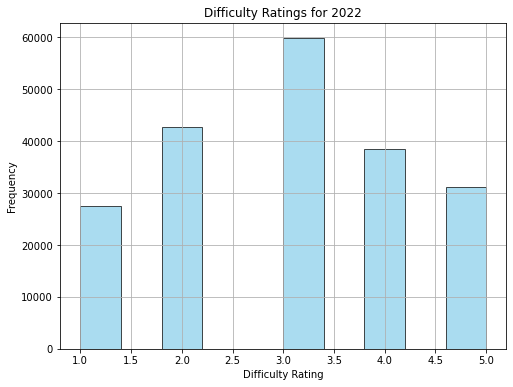

In [67]:
data_2022 = df[df['date_Rating'].dt.year == 2022]
difficulty_2022 = data_2022['difficultyRating_Rating']

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(difficulty_2023, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Difficulty Ratings for 2022')
plt.xlabel('Difficulty Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [69]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment score (handling non-string values)
def calculate_sentiment_score(comment):
    if isinstance(comment, str):
        return sia.polarity_scores(comment)['compound']
    else:
        return 0 

ratings['Sentiment_Score'] = ratings['comment_Rating'].apply(calculate_sentiment_score)

most_negative_comments = ratings.sort_values(by='Sentiment_Score', ascending=True)['comment_Rating'].head(10)

print("Top 10 most negative comments for 2023:")
for comment in most_negative_comments:
    print(comment)

/var/folders/jk/26c0nrvd30sbw9k4_2ns250c0000gn/T/ipykernel_75032/2958242913.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['Sentiment_Score'] = ratings['comment_Rating'].apply(calculate_sentiment_score)


Top 10 most negative comments for 2023:
horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible horrible
worst class i ever took worst professor even worse ta i took this class because i needed an elective and i like greek mythology but it was terrible they more worried about catching people cheating than anything they failed many students on a test for suspected cheating for the dumbest reasons anon
run simoska does teach she reads the textbook aloud and does problems from it but gets most problems wrong and gets angry if corrected she blames students for not succeeding and publicly shames them for asking questions she does not respect when you get sick official excuses do help she refuses all responsibi

In [86]:
from collections import Counter
import ast

def safe_eval(tags_str):
    try:
        return ast.literal_eval(tags_str)
    except (SyntaxError, ValueError):
        return []

ratings_cleaned = ratings.dropna(subset=['ratingTags_Rating'])



ratings_cleaned = ratings


ratings.loc[:, 'ratingTags_Rating'] = ratings['ratingTags_Rating'].apply(safe_eval)

all_tags = [tag for sublist in ratings['ratingTags_Rating'] for tag in sublist]

tag_counts = Counter(all_tags)

top_tags = tag_counts.most_common(10)

print("Top 10 most used tags for 2023:")
for tag, count in top_tags:
    print(f"{tag}: {count}")



Top 10 most used tags for 2023:


/var/folders/jk/26c0nrvd30sbw9k4_2ns250c0000gn/T/ipykernel_75032/3967945896.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_cleaned = ratings.dropna(inplace=True)
/var/folders/jk/26c0nrvd30sbw9k4_2ns250c0000gn/T/ipykernel_75032/3967945896.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_cleaned.loc[:, 'ratingTags_Rating'] = ratings_cleaned['ratingTags_Rating'].apply(safe_eval)


In [96]:
ratings = ratings.dropna(subset=['ratingTags_Rating'])
ratings['ratingTags_Rating'].head(25)

209      Participation matters--Amazing lectures --Caring
759                       Respected--Graded by few things
941                     Caring--Lecture heavy--Test heavy
1018    Participation matters--EXTRA CREDIT--Graded by...
1068    Get ready to read--Participation matters--Amaz...
1189                 Amazing lectures --Hilarious--Caring
1322                                Participation matters
1475             Participation matters--Amazing lectures 
1513    Amazing lectures --Clear grading criteria--Res...
1514        Tough grader--Lots of homework--Lecture heavy
1521                                        Lecture heavy
1565                                        Lecture heavy
1585            Clear grading criteria--Hilarious--Caring
1594                                    Get ready to read
1597                     Inspirational--Hilarious--Caring
1598    Get ready to read--Caring--Accessible outside ...
1599          Amazing lectures --Inspirational--Hilarious
1600          

In [99]:
def safe_eval(tags_str):
    try:
        return ast.literal_eval(tags_str)
    except (SyntaxError, ValueError):
        return []
ratings.loc[:, 'ratingTags_Rating'] = ratings['ratingTags_Rating'].apply(safe_eval)
all_tags = [tag for sublist in ratings['ratingTags_Rating'] for tag in sublist]

tag_counts = Counter(all_tags)

top_tags = tag_counts.most_common(10)

print("Top 10 most used tags for 2023:")
for tag, count in top_tags:
    print(f"{tag}: {count}")

Top 10 most used tags for 2023:


In [19]:
df['date_Rating'] = pd.to_datetime(df['date_Rating'])

ratings_1999_to_2020 = df[(df['date_Rating'].dt.year >= 1999) & (df['date_Rating'].dt.year <= 2022)]

ratings_2020_to_2024 = df[(df['date_Rating'].dt.year >= 2023) & (df['date_Rating'].dt.year <= 2024)]

# Define a mapping of letter grades to numeric values
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}

# Convert 'grade_Rating' column to numeric format based on the mapping
ratings_1999_to_2020.loc[:, 'grade_Rating'] = ratings_1999_to_2020['grade_Rating'].map(grade_mapping)
ratings_2020_to_2024.loc[:, 'grade_Rating'] = ratings_2020_to_2024['grade_Rating'].map(grade_mapping)

# Drop rows with NaN values in 'grade_Rating' column
ratings_1999_to_2020 = ratings_1999_to_2020.dropna(subset=['grade_Rating'])
ratings_2020_to_2024 = ratings_2020_to_2024.dropna(subset=['grade_Rating'])

# Calculate the average grade for the period 1999 to 2020
average_grade_1999_to_2020 = ratings_1999_to_2020['grade_Rating'].mean()

# Calculate the average grade for the period 2020 to 2024
average_grade_2020_to_2024 = ratings_2020_to_2024['grade_Rating'].mean()

print("Average grade from 1999 to 2020:", average_grade_1999_to_2020)
print("Average grade from 2020 to 2024:", average_grade_2020_to_2024)



/var/folders/jk/26c0nrvd30sbw9k4_2ns250c0000gn/T/ipykernel_63283/2080000035.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_1999_to_2020.loc[:, 'grade_Rating'] = ratings_1999_to_2020['grade_Rating'].map(grade_mapping)
/var/folders/jk/26c0nrvd30sbw9k4_2ns250c0000gn/T/ipykernel_63283/2080000035.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_2020_to_2024.loc[:, 'grade_Rating'] = ratings_2020_to_2024['grade_Rating'].map(grade_mapping)


Average grade from 1999 to 2020: 3.6440633317783937
Average grade from 2020 to 2024: 3.6306112469437655
